In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [45]:
df = pd.read_csv(r"C:\Users\RACHIT\Desktop\health.csv")
df.head(10)

,BloodPressure,BodyTemp,HeartRate,OxygenSat,target
0,145,96.7,71,98.6,1
1,130,96.9,74,98.6,1
2,130,97.0,80,98.6,1
3,120,97.1,73,98.6,1
4,120,97.1,75,98.6,1
5,140,97.1,82,98.1,1
6,140,97.2,64,97.5,1
7,120,97.3,69,97.5,1
8,172,97.4,70,97.5,1
9,150,97.4,68,97.5,1


In [46]:
df.target.value_counts() #   1 means Disease is there and 0 means No Disease

1    165
0    138
Name: target, dtype: int64

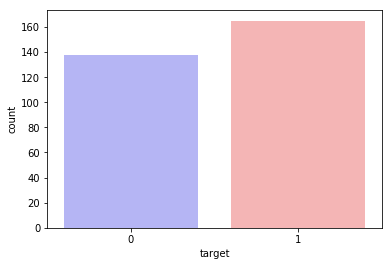

In [47]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [59]:
countNoDisease = len(df[df.target == 0])
countHaveDisease = len(df[df.target == 1])
print("Percentage of Patients Don't Have Disease: {:.2f}%".format((countNoDisease / (len(df.target))*100)))
print("Percentage of Patients Have  Disease: {:.2f}%".format((countHaveDisease / (len(df.target))*100)))

Percentage of Patients Don't Have Disease: 45.54%
Percentage of Patients Have  Disease: 54.46%


In [49]:
df.groupby('target').mean()

,BloodPressure,BodyTemp,HeartRate,OxygenSat
target,,,,
0,134.398551,98.111594,73.463768,98.047826
1,129.303030,98.332121,73.521212,97.632121


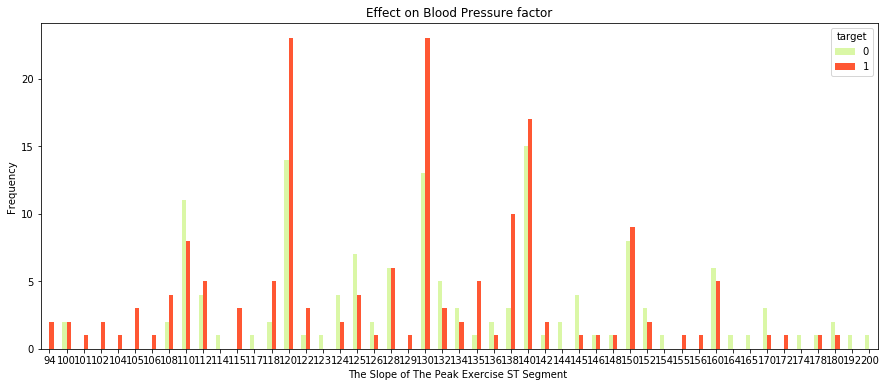

In [60]:
pd.crosstab(df.BloodPressure,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Effect on Blood Pressure factor')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

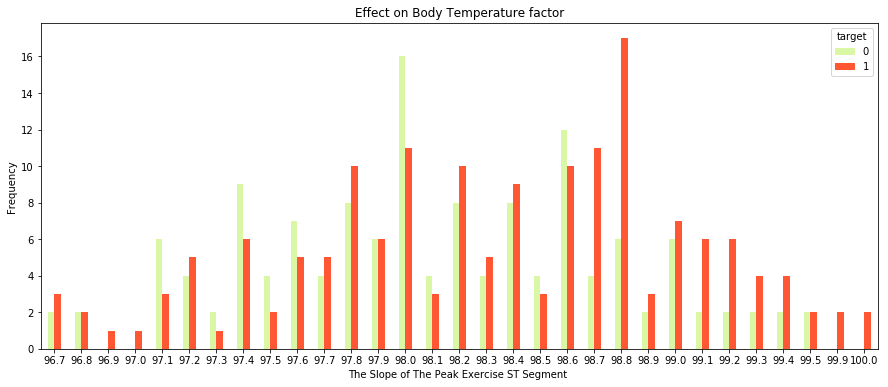

In [61]:
pd.crosstab(df.BodyTemp,df.target).plot(kind="bar",figsize=(15,6),color=['#DAF7A6','#FF5733' ])
plt.title('Effect on Body Temperature factor')
plt.xlabel('The Slope of The Peak Exercise ST Segment ')
plt.xticks(rotation = 0)
plt.ylabel('Frequency')
plt.show()

In [52]:
y = df.target.values
x = df.drop(['target'], axis = 1)

In [53]:
from sklearn.preprocessing import StandardScaler
s_sc = StandardScaler()
col_to_scale = ['BloodPressure', 'BodyTemp', 'HeartRate', 'OxygenSat']
x= s_sc.fit_transform(x[col_to_scale])

In [54]:
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_train, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print("Classification Report:", end='')
        print(f"\tPrecision Score: {precision_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tRecall Score: {recall_score(y_test, pred) * 100:.2f}%")
        print(f"\t\t\tF1 score: {f1_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [55]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 99.59%
_______________________________________________
Classification Report:	Precision Score: 100.00%
			Recall Score: 99.25%
			F1 score: 99.62%
_______________________________________________
Confusion Matrix: 
 [[109   0]
 [  1 132]]

Test Result:
Accuracy Score: 81.97%
_______________________________________________
Classification Report:	Precision Score: 81.82%
			Recall Score: 84.38%
			F1 score: 83.08%
_______________________________________________
Confusion Matrix: 
 [[23  6]
 [ 5 27]]



In [57]:
from sklearn.svm import SVC


svm_model = SVC(kernel='rbf', gamma=0.5, C=1.0)
svm_model.fit(X_train, y_train)
print_score(svm_model, X_train, y_train, X_test, y_test, train=True)
print_score(svm_model, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 75.21%
_______________________________________________
Classification Report:	Precision Score: 77.44%
			Recall Score: 77.44%
			F1 score: 77.44%
_______________________________________________
Confusion Matrix: 
 [[ 79  30]
 [ 30 103]]

Test Result:
Accuracy Score: 62.30%
_______________________________________________
Classification Report:	Precision Score: 63.64%
			Recall Score: 65.62%
			F1 score: 64.62%
_______________________________________________
Confusion Matrix: 
 [[17 12]
 [11 21]]



In [58]:
from sklearn.model_selection import GridSearchCV
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree = DecisionTreeClassifier(random_state=42)
grid_search_cv = GridSearchCV(tree, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3, iid=True)
tree = DecisionTreeClassifier(criterion='gini', 
                              max_depth=3,
                              min_samples_leaf=2, 
                              min_samples_split=2, 
                              splitter='random')
tree.fit(X_train, y_train)

print_score(tree, X_train, y_train, X_test, y_test, train=True)
print_score(tree, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 67.77%
_______________________________________________
Classification Report:	Precision Score: 66.47%
			Recall Score: 83.46%
			F1 score: 74.00%
_______________________________________________
Confusion Matrix: 
 [[ 53  56]
 [ 22 111]]

Test Result:
Accuracy Score: 57.38%
_______________________________________________
Classification Report:	Precision Score: 57.89%
			Recall Score: 68.75%
			F1 score: 62.86%
_______________________________________________
Confusion Matrix: 
 [[13 16]
 [10 22]]

